In [70]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
left_wing = pd.read_csv('Data_Cleaning/Left_Wing_Data/is_left_wing.csv')
right_wing = pd.read_csv('Data_Cleaning/Right_Wing_Data/is_right_wing.csv')
all_english = pd.read_csv('Data_Cleaning/All_English/All_English_Tweets.csv')
all_english.drop_duplicates(subset='text', inplace=True)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,5,7,8,9,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
left_analysis = {
    "Hostile_Language": 0,
    "Defensive_Language": 0,
    "Overlapping_Language": 0,
    "Unrelated_Discussion": 0,
}

In [4]:
right_analysis = {
    "Hostile_Language": 0,
    "Defensive_Language": 0,
    "Overlapping_Language": 0,
    "Unrelated_Discussion": 0,
}

In [5]:
all_english_analysis = {
    "Hostile_Language": 0,
    "Defensive_Language": 0,
    "Overlapping_Language": 0,
    "Unrelated_Discussion": 0,
}

In [6]:
hostile_engagement = ["istandwithputin", "guns", "western propaganda", "propaganda", "united states",
    "lethal", "liberals", "conservatives", "socialists", "communists", "democrats", "republicans", "fascists", 
    "nuclear", "punish", "captured", "shelling"]

In [7]:
defensive_engagement = ["reinforce", "guard", "support", "suspend", "#ukraine",
    "propaganda", "calls", "call", "surrender", "abstain", "solider calls mom", "putinswar" ] #Add more words

In [8]:
overlapping_engagement = ["seize", "ruble", "sanctions", "#nowar", "ukraine", "russia", 
    "breaking news", "breaking", "fox news"] #Add more words

In [9]:
unrelated_engagement = ["syria", "muslim", "fake news", "afghanistan", "palestinian"] #Add more words

In [10]:
for row in left_wing['text']:
    for word in hostile_engagement:
        if word in row:
            left_analysis['Hostile_Language'] += 1

for row in left_wing['text']:
    for word in defensive_engagement:
        if word in row:
            left_analysis['Defensive_Language'] += 1

for row in left_wing['text']:
    for word in overlapping_engagement:
        if word in row:
            left_analysis['Overlapping_Language'] += 1

for row in left_wing['text']:
    for word in unrelated_engagement:
        if word in row:
            left_analysis['Unrelated_Discussion'] += 1

In [11]:
left_analysis

{'Hostile_Language': 126,
 'Defensive_Language': 246,
 'Overlapping_Language': 192,
 'Unrelated_Discussion': 2}

In [12]:
for row in right_wing['text']:
    for word in hostile_engagement:
        if word in row:
            right_analysis['Hostile_Language'] += 1
            
for row in right_wing['text']:
    for word in defensive_engagement:
        if word in row:
            right_analysis['Defensive_Language'] += 1
            
for row in right_wing['text']:
    for word in overlapping_engagement:
        if word in row:
            right_analysis['Overlapping_Language'] += 1
    
for row in right_wing['text']:
    for word in unrelated_engagement:
        if word in row:
            left_analysis['Unrelated_Discussion'] += 1

In [13]:
# Used to get rid of the 1 float in the DF
all_english = all_english[all_english['text'].apply(lambda x: isinstance(x, str))]

for row in all_english['text']:
    for word in hostile_engagement:
        if word in row:
            all_english_analysis['Hostile_Language'] += 1
            
for row in all_english['text']:
    for word in defensive_engagement:
        if word in row:
            all_english_analysis['Defensive_Language'] += 1

for row in all_english['text']:
    for word in overlapping_engagement:
        if word in row:
            all_english_analysis['Overlapping_Language'] += 1

for row in all_english['text']:
    for word in unrelated_engagement:
        if word in row:
            all_english_analysis['Unrelated_Discussion'] += 1

In [14]:
right_table = pd.DataFrame.from_dict(right_analysis, orient='index')
right_table.rename(columns={0: 'Counts'}, inplace=True)
right_table

,Counts
Hostile_Language,169
Defensive_Language,249
Overlapping_Language,212
Unrelated_Discussion,0


In [15]:
left_table = pd.DataFrame.from_dict(left_analysis, orient='index')
left_table.rename(columns={0: 'Counts'}, inplace=True)
left_table

,Counts
Hostile_Language,126
Defensive_Language,246
Overlapping_Language,192
Unrelated_Discussion,5


In [16]:
all_english_analysis

{'Hostile_Language': 15664,
 'Defensive_Language': 47475,
 'Overlapping_Language': 52296,
 'Unrelated_Discussion': 719}

In [17]:
february_tweets_by_time = all_english.loc[all_english['tweetcreatedts'] < '2022-03-01 00:00:00']
february_tweets_by_time.drop(['userid', 'username', 'acctdesc', 'location', 'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags', 'language', 'coordinates', 'favorite_count'], axis=1, inplace=True)
february_tweets_by_time.groupby('tweetcreatedts').count()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tweetid
tweetcreatedts,
2022-02-27 00:07:16,20
2022-02-27 00:07:17,20
2022-02-27 00:07:18,18
2022-02-27 00:07:19,19
2022-02-27 00:07:20,17
...,...
2022-02-28 23:31:17,1
2022-02-28 23:31:18,5
2022-02-28 23:31:19,2


In [18]:
march_tweets_by_time = all_english.loc[all_english['tweetcreatedts'] > '2022-03-01 00:00:00']
march_tweets_by_time.drop(['userid', 'username', 'acctdesc', 'location', 'followers', 'totaltweets', 'retweetcount', 'text', 'hashtags', 'language', 'coordinates', 'favorite_count'], axis=1, inplace=True)
march_tweets_by_time.groupby('tweetcreatedts').count()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,tweetid
tweetcreatedts,
2022-03-01 00:00:01,15
2022-03-01 00:00:02,6
2022-03-01 00:00:04,7
2022-03-01 00:00:05,6
2022-03-01 00:00:06,4
...,...
2022-03-02 23:59:52,1
2022-03-02 23:59:54,3
2022-03-02 23:59:55,4


In [19]:
march_tweets_by_time = march_tweets_by_time.drop(7590)

In [20]:
march_tweets_by_time

,tweetid,tweetcreatedts
794713,1.498448e+18,2022-03-01 00:00:01
794714,1.498448e+18,2022-03-01 00:00:01
794715,1.498448e+18,2022-03-01 00:00:01
794716,1.498448e+18,2022-03-01 00:00:01
794717,1.498448e+18,2022-03-01 00:00:01
...,...,...
1700510,1.499173e+18,2022-03-02 23:59:55
1700511,1.499173e+18,2022-03-02 23:59:55
1700512,1.499173e+18,2022-03-02 23:59:55
1700513,1.499173e+18,2022-03-02 23:59:55


In [80]:
m_c_time = march_tweets_by_time.groupby('tweetcreatedts').count()
m_time_list = []
m_count_list = []

for time in march_tweets_by_time['tweetcreatedts']:
        m_time_list.append(time)

set_m = set(m_time_list)
reset_m_list = list(set_m)
print(len(reset_m_list))

for tweets in m_c_time['tweetid']:
    m_count_list.append(tweets)

print(len(m_count_list))

#Access slice of March tweets here. Start with m_time_list[20] and m_count_list[20]

48400
48400


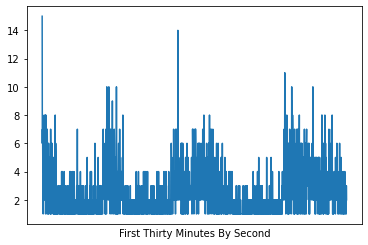

In [84]:
#Every ten-twelve minutes there are large spikes in the amount of tweets. This probably corresponds to breaking news
plt.plot(reset_m_list[:1800], m_count_list[:1800])
plt.xlabel('First Thirty Minutes By Second')
plt.xticks([])
plt.show()

In [21]:
february_tweets_by_time

,tweetid,tweetcreatedts
0,1.497725e+18,2022-02-27 00:07:16
1,1.497725e+18,2022-02-27 00:07:16
2,1.497725e+18,2022-02-27 00:07:16
3,1.497725e+18,2022-02-27 00:07:16
4,1.497725e+18,2022-02-27 00:07:16
...,...,...
794695,1.498441e+18,2022-02-28 23:31:20
794696,1.498441e+18,2022-02-28 23:31:20
794697,1.498441e+18,2022-02-28 23:31:21
794698,1.498441e+18,2022-02-28 23:31:21


In [47]:
#February Cleaned Time Tweets and lists for plotting purposes
f_c_time = february_tweets_by_time.groupby('tweetcreatedts').count()
f_time_list = []
f_count_list = []

for time in february_tweets_by_time['tweetcreatedts']:
        f_time_list.append(time)

set_f = set(f_time_list)
reset_f_list = list(set_f)
print(len(reset_f_list))

for tweets in f_c_time['tweetid']:
    f_count_list.append(tweets)

print(len(f_count_list))

#Access slice of February tweets here. Start with f_time_list[20] and f_count_list[20]


38286
38286


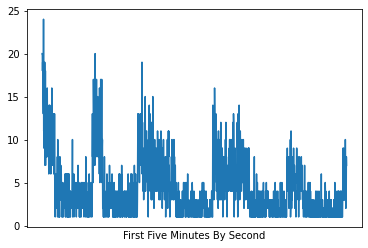

In [81]:
#Every ten-twelve minutes there are large spikes in the amount of tweets. This probably corresponds to breaking news
plt.plot(reset_f_list[:1800], f_count_list[:1800])
plt.xlabel('First Thirty Minutes By Second')
plt.xticks([])
plt.show()